In [57]:
import mne
import os, glob
import matplotlib.pyplot as plt

mne.viz.set_browser_backend("matplotlib")

'matplotlib'

### Set Parameters

In [58]:
# parameters
SUBJECT = "C"
SESSION = "Moth5"
BLOCKS = ["01", "02", "03", "04", "05", "06", "07", "EmptyRoom"]
BADS_MANUAL = ["MEG1212"]  # as written in the logs badchannels_edited.txt
LOC_RAW = f"/project_data/volume0/newmeg/{SESSION}/data/raw/{SUBJECT}/"
LOC_SAVE = f"/project_data/volume0/jerryjin/moth_meg/{SESSION}/mysss/{SUBJECT}/"
PLOT = True

In [59]:
# make save directory if it doesn't exist
if not os.path.exists(LOC_SAVE):
    os.makedirs(LOC_SAVE)

In [60]:
# calibration and crosstalk files for maxfilter
calibration_file = "/home/jerryjin/megdata/neuro/sss_cal.dat"
crosstalk_file = "/home/jerryjin/megdata/neuro/ct_sparse.fif"

### Check Files

In [61]:
# check all recording files for this session
files = sorted(glob.glob(LOC_RAW + "*raw.fif"))
files

['/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_01_raw.fif',
 '/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_02_raw.fif',
 '/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_03_raw.fif',
 '/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_04_raw.fif',
 '/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_05_raw.fif',
 '/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_06_raw.fif',
 '/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_07_raw.fif',
 '/project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_EmptyRoom_raw.fif']

In [62]:
# first recording file
first_f = glob.glob(LOC_RAW + f"*{SUBJECT}_{SESSION}_01*raw.fif")[0]
print("first: ", first_f)

first:  /project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_01_raw.fif


### Run SSS

In [63]:
all_sss = []
for BLOCK in BLOCKS:

    # load raw data
    raw_f = glob.glob(LOC_RAW + f"*{SUBJECT}_{SESSION}_{BLOCK}*raw.fif")[0]
    raw = mne.io.read_raw_fif(raw_f, preload=True)

    # add bad channels and delete existing proj
    raw.info["bads"] += BADS_MANUAL
    raw.del_proj()

    # spatial-temporal SSS
    sss = mne.preprocessing.maxwell_filter(
        raw,
        calibration=calibration_file,
        cross_talk=crosstalk_file,
        st_duration=4,
        st_correlation=0.98,
        origin=(0.0, 0.0, 0.04),
        coord_frame="head",
        destination=first_f,
        verbose=True,
    )

    # save
    save_f = os.path.basename(raw_f).replace("_raw.fif", "_sss_raw.fif")
    sss.save(LOC_SAVE + save_f)

    # append to list for plotting
    all_sss.append(sss.copy())

Opening raw data file /project_data/volume0/newmeg/Moth5/data/raw/C/C_Moth5_01_raw.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle


        generated with dossp-2.1 (1 x 306)  idle
    Range : 39000 ... 877999 =     39.000 ...   877.999 secs
Ready.
Reading 0 ... 838999  =      0.000 ...   838.999 secs...
Maxwell filtering raw data
102 of 102 magnetometer types replaced with T3.
    Bad MEG channels being reconstructed: ['MEG1212']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sss_cal.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.4° ± 0.4° (max: 1.7°)
    Using origin 0.0, 0.0, 40.0 mm in the head frame
    Processing data using tSSS with st_duration=4.0
        Using 85/95 harmonic components for    0.000  (70/80 in, 15/15 out)
    Using loaded raw data
    Spatiotemporal window did not fit evenly intocontiguous data segment. 3.00 seconds were lumped into the previous window.
    Processing 209 data chunks
        Projecting  4 intersecting tSSS components for    0.000 -    3.999 s   (#1/209)
        Projecting  1 intersecting tSSS co

### Plot

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


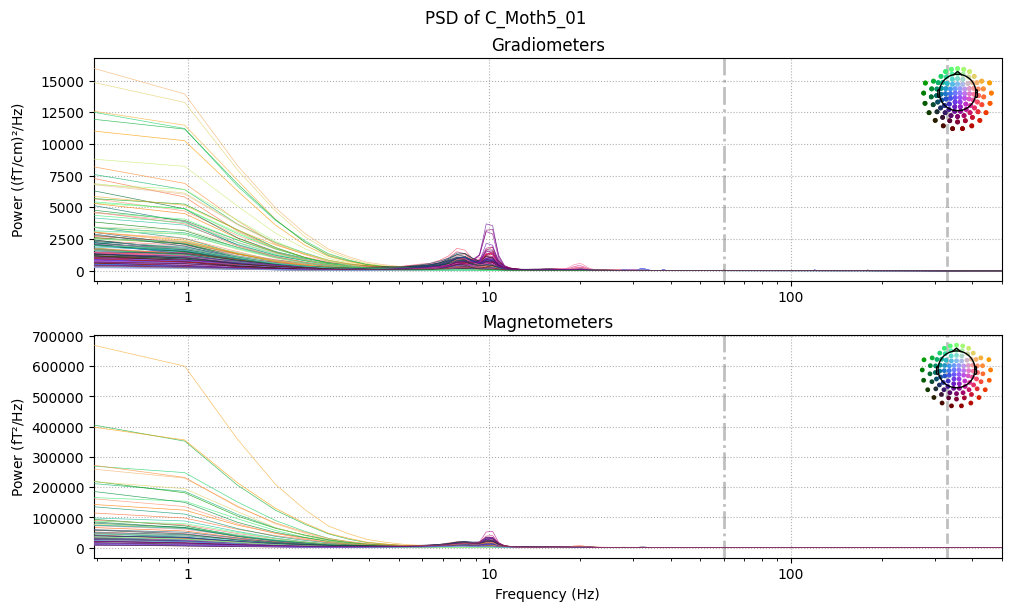

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


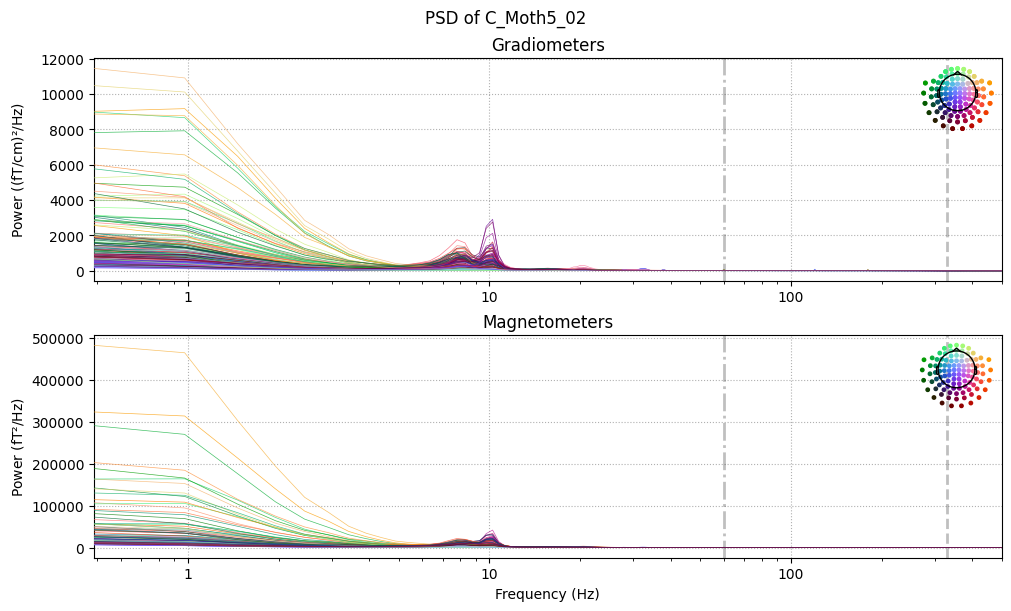

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


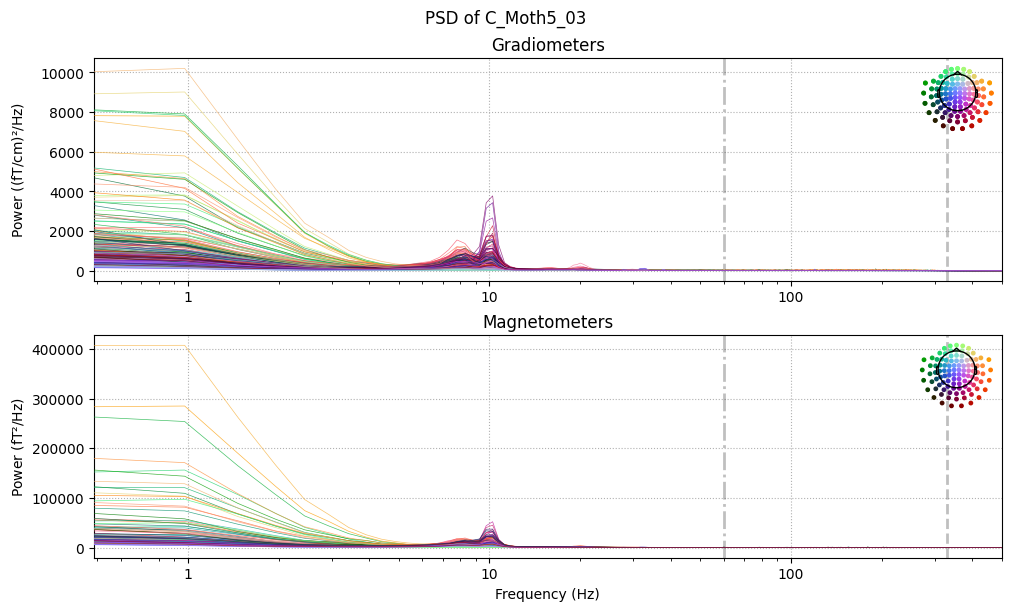

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


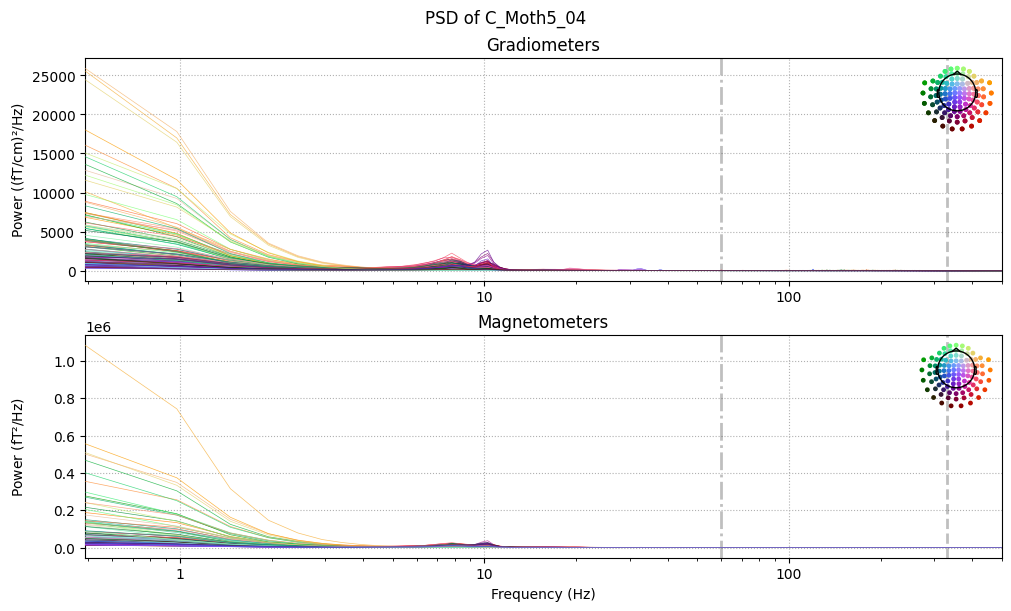

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


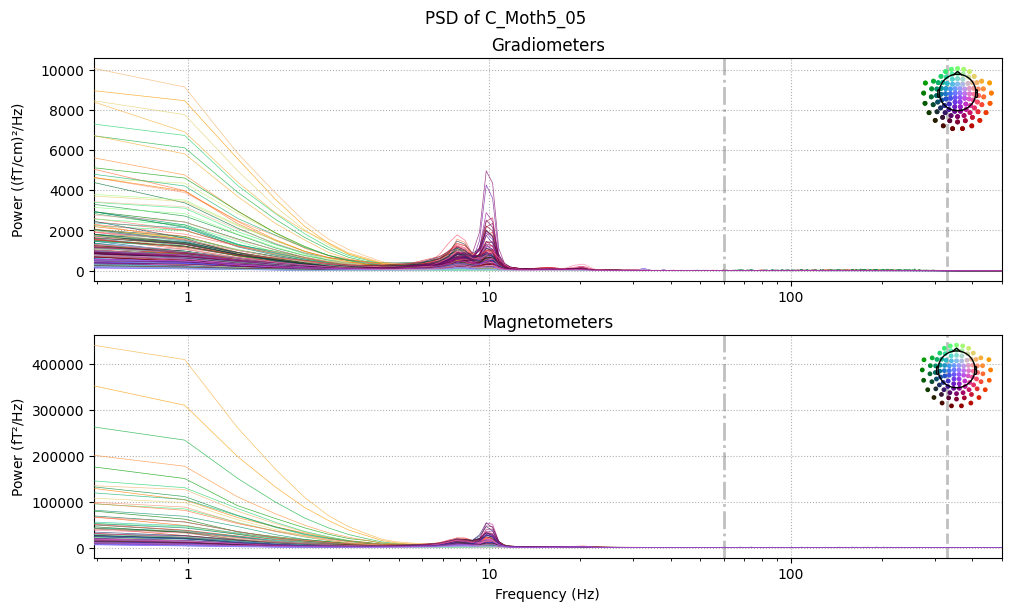

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


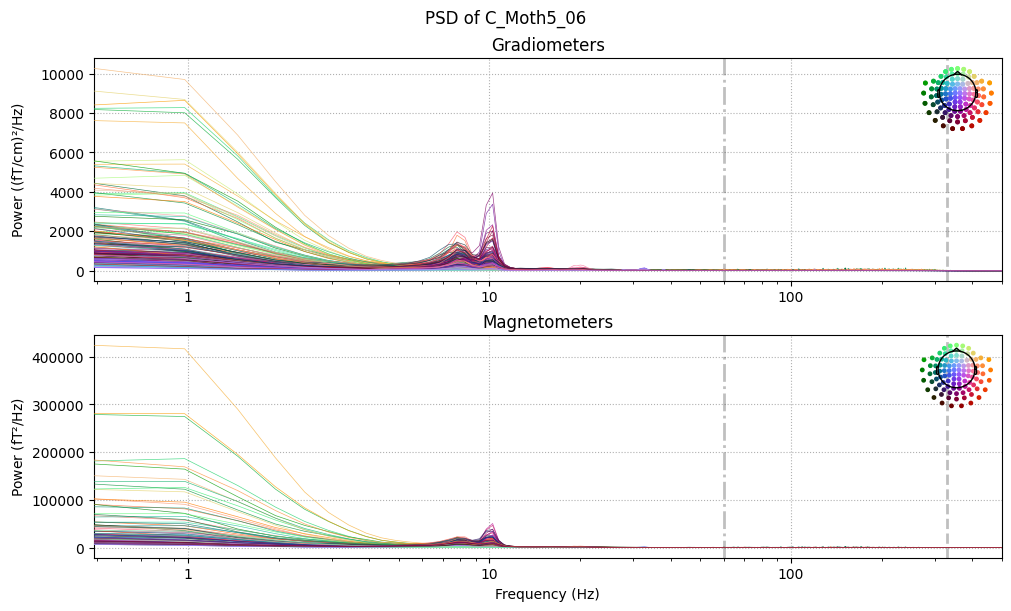

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


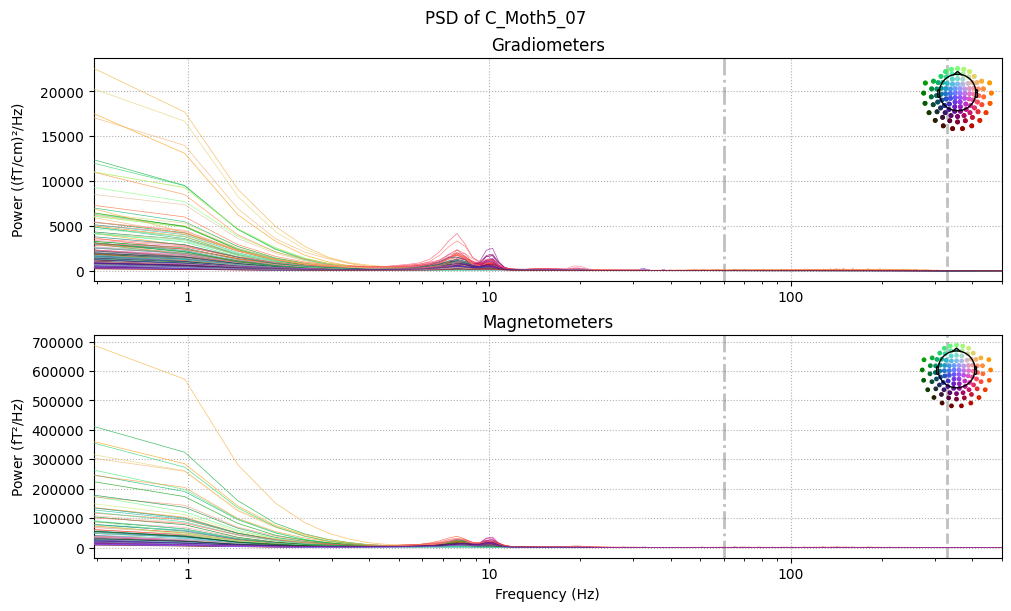

Effective window size : 2.048 (s)
Plotting power spectral density (dB=False).


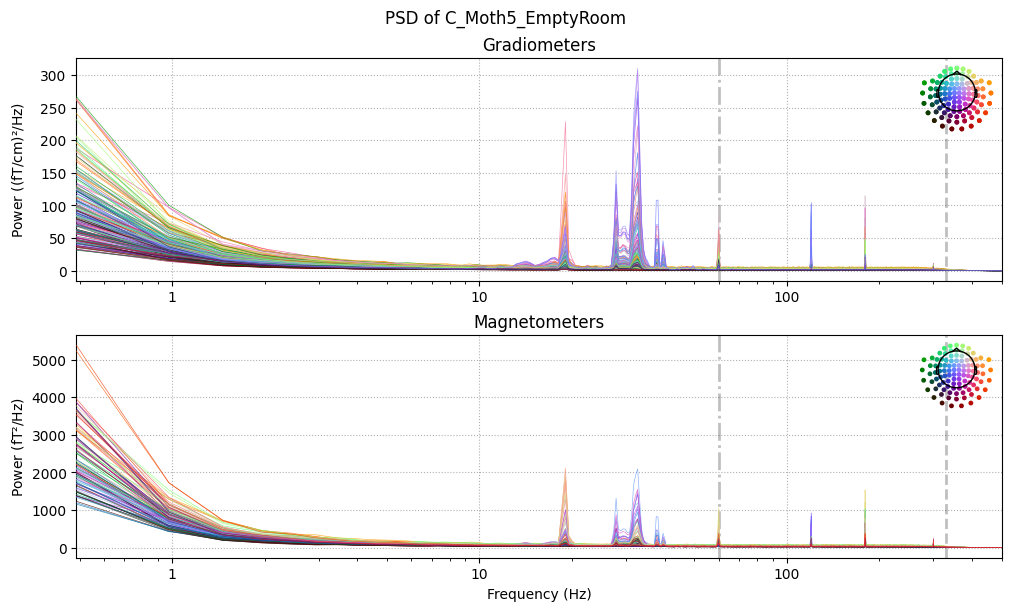

In [64]:
average = False
if PLOT:
    for sss, BLOCK in zip(all_sss, BLOCKS):
        spectrum = sss.compute_psd()
        spectrum.plot(average=average, dB=False, xscale="log")
        plt.suptitle(f"PSD of {SUBJECT}_{SESSION}_{BLOCK}")
        plt.show()